<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Lab5_FFT_LCT_IU_Hany_Hamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks
* Plot Sine and Cosine wave
* Plot weigted sum of sin, cos functions
* Plot square waves
* Plot noisy weigted sum of sin, cos functions (Standard Normal distribution noise)
* Plot noisy square waves (Standard Normal distribution noise)


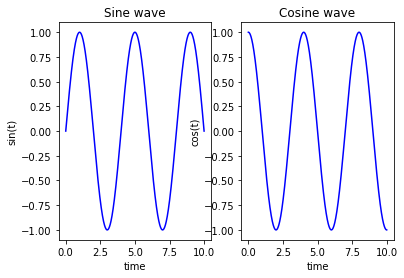

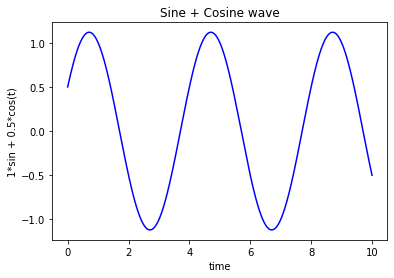

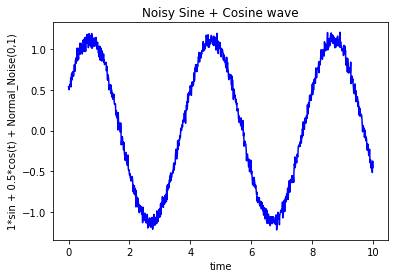

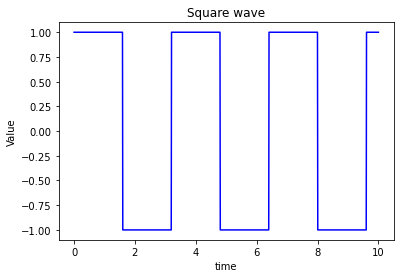

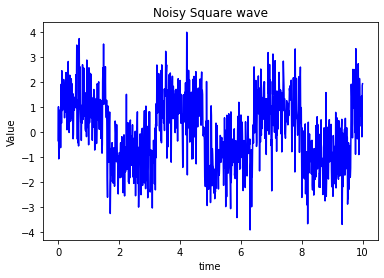

In [64]:
from scipy import signal
import matplotlib.pyplot as plt
from math import sin, cos
import numpy as np
from scipy import signal

mix_a, mix_b = 1,0.5
noise_mu, noise_stdev = 0,1


def sinFunc(t,omg=0.5):
  return np.sin(omg*np.pi*t)

def cosFunc(t,beta=0.5):
  return np.cos(beta*np.pi*t)

def mixFunc(t,a=1,b=1,omg=0.5,beta=0.5):
  return a*sinFunc(t,omg) + b*cosFunc(t,beta)

def noiseSignalFunc(t, mu=0, stdev=1,a=1,b=1,omg=0.5,beta=0.5, noise_coeff = 0.05):
  return mixFunc(t,a,b,omg,beta) + noise_coeff*np.random.normal(mu, stdev)

def squareWaveFunc(t):
  return signal.square(1/8 * np.pi * 5 * t)


def noisySquareWaveFunc(t,mu=0, stdev=1):
  return signal.square(1/8 * np.pi * 5 * t) + 1*np.random.normal(mu, stdev)

time = np.linspace(0, 10, 1000)    # interval from 0 to 1

sinVal = [sinFunc(i) for i in time]
cosVal = [cosFunc(i) for i in time]
mixVal = [mixFunc(i,mix_a,mix_b) for i in time]
noisyMixVal = [noiseSignalFunc(i,a=mix_a,b=mix_b) for i in time]
squareWaveVal = [squareWaveFunc(i) for i in time]
noisySquareWaveVal = [noisySquareWaveFunc(i) for i in time]


plt.subplot(121)
plt.plot(time, sinVal, "b")
plt.xlabel('time')
plt.ylabel('sin(t)')
plt.title('Sine wave')

plt.subplot(122)
plt.plot(time, cosVal, "b")
plt.xlabel('time')
plt.ylabel('cos(t)')
plt.title('Cosine wave')

plt.show()
# plt.subplot(165)
plt.plot(time, mixVal, "b")
plt.xlabel('time')
plt.ylabel('{:}*sin + {:}*cos(t)'.format(mix_a,mix_b))
plt.title('Sine + Cosine wave')

plt.show()


# plt.subplot(113)
plt.plot(time, noisyMixVal, "b")
plt.xlabel('time')
plt.ylabel('{:}*sin + {:}*cos(t) + Normal_Noise({:},{:})'.format(mix_a,mix_b,noise_mu, noise_stdev))
plt.title('Noisy Sine + Cosine wave')

plt.show()


plt.plot(time, squareWaveVal, "b")
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Square wave')

plt.show()

plt.plot(time, noisySquareWaveVal, "b")
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Noisy Square wave')

plt.show()

# Tasks
* Apply FFT to Nosiy square wave
* Plot the result of the FFT



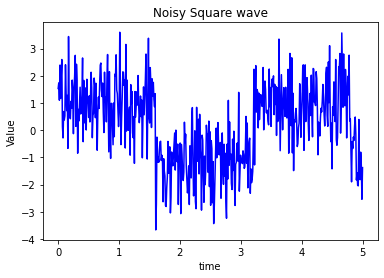

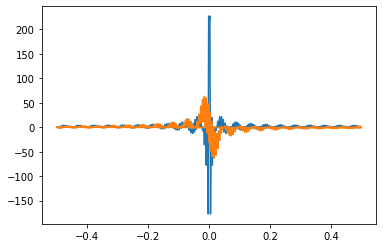

In [3]:
time = np.linspace(0, 5, 500)
noisySquareWaveVal = [noisySquareWaveFunc(i) for i in time]


plt.plot(time, noisySquareWaveVal, "b")
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Noisy Square wave')

plt.show()

sp = np.fft.fft(noisySquareWaveFunc(time))
freq = np.fft.fftfreq(time.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

# Tasks
* Apply FFT to Nosiy weighted sum of sin and cos functions
* Plot the result of FFT



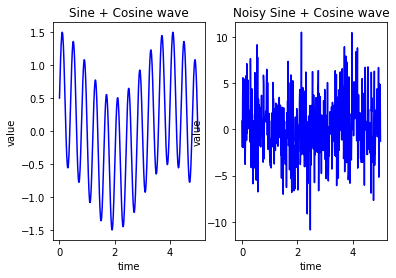

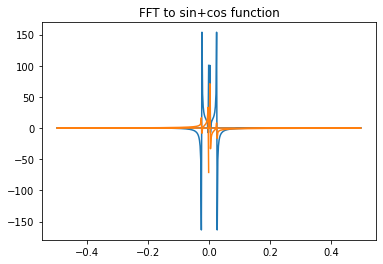

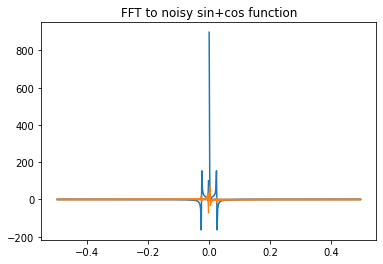

In [105]:
time = np.linspace(0, 5, 500)
mix_a, mix_b = 1,0.5
omega, beta = 5, 0.5
noise_coeff = 3
mixVal = [mixFunc(i,a=mix_a,b=mix_b,omg=omega,beta=beta) for i in time]
noisyMixVal = [noiseSignalFunc(i,a=mix_a,b=mix_b,omg=omega,beta=beta, noise_coeff=noise_coeff) for i in time]


plt.subplot(121)
plt.plot(time, mixVal, "b")
plt.xlabel('time')
plt.ylabel('value')
plt.title('Sine + Cosine wave')

plt.subplot(122)
plt.plot(time, noisyMixVal, "b")
plt.xlabel('time')
plt.ylabel('value')
plt.title('Noisy Sine + Cosine wave')

plt.show()

sp_normal = np.fft.fft(mixFunc(time,a=mix_a,b=mix_b,omg=omega,beta=beta))
freq = np.fft.fftfreq(time.shape[-1])

# plt.subplot(121)
plt.plot(freq, sp_normal.real, freq, sp_normal.imag)
# plt.ylim(-100,100)

plt.title("FFT to sin+cos function")
plt.show()


sp_noisy = np.fft.fft(noiseSignalFunc(time,a=mix_a,b=mix_b,omg=omega,beta=beta, noise_coeff=noise_coeff))
# plt.subplot(122)
plt.plot(freq, sp_noisy.real, freq, sp_noisy.imag)
# plt.ylim(-100,100)
plt.title("FFT to noisy sin+cos function")
plt.show()

# Tasks
* Apply some Filterations for the noisy signal (Band Pass filter has been applied)
* Plot before/after filterations for the signal



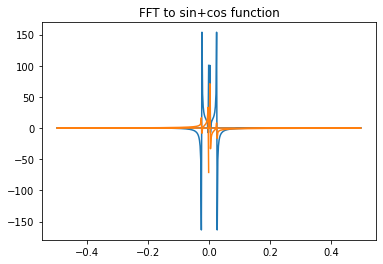

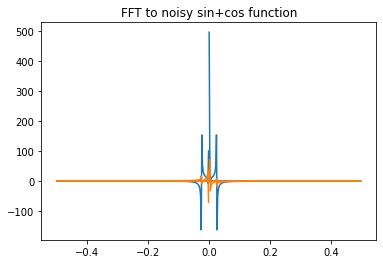

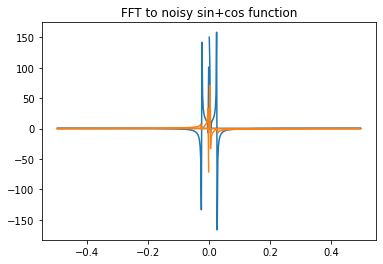

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


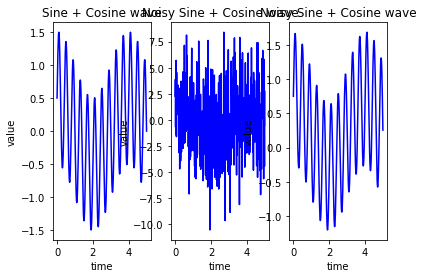

In [114]:
time = np.linspace(0, 5, 500)
mix_a, mix_b = 1,0.5
omega, beta = 5, 0.5
noise_coeff = 3
high_band_thresh = [-150,150]

mixVal = [mixFunc(i,a=mix_a,b=mix_b,omg=omega,beta=beta) for i in time]
noisyMixVal = [noiseSignalFunc(i,a=mix_a,b=mix_b,omg=omega,beta=beta, noise_coeff=noise_coeff) for i in time]


sp_normal = np.fft.fft(mixFunc(time,a=mix_a,b=mix_b,omg=omega,beta=beta))
sp_noisy = np.fft.fft(noiseSignalFunc(time,a=mix_a,b=mix_b,omg=omega,beta=beta, noise_coeff=noise_coeff))
freq = np.fft.fftfreq(time.shape[-1])

def BandPassFilter(signal, threshold):
  new_signal = signal.copy()
  for i,val in enumerate(signal):
    if(val.real < threshold[0]):
        new_signal[i] = (threshold[0]+val.imag)
    if(val.real > threshold[1]):
        new_signal[i] = (threshold[1]+val.imag)
  return new_signal


sp_filtered = BandPassFilter(sp_noisy, high_band_thresh)
filteredNoisyMixVal = np.fft.ifft(sp_filtered)

# plt.subplot(131)
plt.plot(freq, sp_normal.real, freq, sp_normal.imag)
plt.title("FFT to sin+cos function")
plt.show()
# plt.subplot(132)
plt.plot(freq, sp_noisy.real, freq, sp_noisy.imag)
plt.title("FFT to noisy sin+cos function")
plt.show()
# plt.subplot(133)
plt.plot(freq, sp_filtered.real, freq, sp_filtered.imag)
plt.title("FFT to noisy sin+cos function")
plt.show()




plt.subplot(131)
plt.plot(time, mixVal, "b")
plt.xlabel('time')
plt.ylabel('value')
plt.title('Sine + Cosine wave')

plt.subplot(132)
plt.plot(time, noisyMixVal, "b")
plt.xlabel('time')
plt.ylabel('value')
plt.title('Noisy Sine + Cosine wave')
plt.subplot(133)
plt.plot(time, filteredNoisyMixVal, "b")
plt.xlabel('time')
plt.ylabel('value')
plt.title('Noisy Sine + Cosine wave')




plt.show()

